# Effects of orbital eccentricity on total solar irradiance

Some new and unfinished notes for ATM 623: Climate Modeling

Brian Rose, April 2025

## The issue: why does total irradiance increase with increasing eccentricity?

In the [Orbital chapter](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/orbital.html) of [The Climate Laboratory](https://doi.org/10.5281/zenodo.4265097), a simple numerical integration is used to show that global, annual mean insolation varies directly (though weakly) with the eccentricity $e$ of Earth's orbit.

More specifically, the graph in [this section of the Orbital notes](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/orbital.html#understanding-the-effects-of-orbital-variations-on-insolation) shows that global, annual mean insolation varies by roughly 0.4 W m$^{-2}$ (with respect to a reference value of around 341.4 W m$^{-2}$, or about 0.1%) for eccentricity ranging between 0.01 and 0.05.

Here we will explore the physical reasons for this dependence.

## Drawings of Earth's eccentric orbit to scale

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

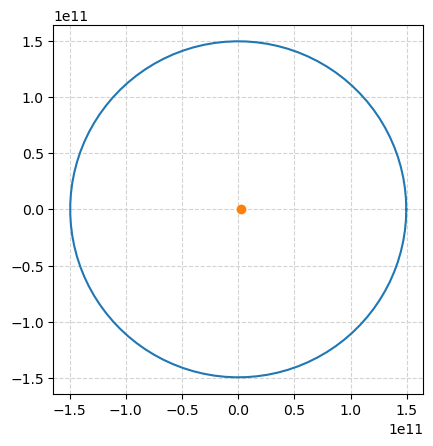

In [20]:
dp = 1.47e11  # Earth-Sun distance at perihelion
da = 1.52e11  # Earth-Sun distance at aphelion

a = (da+dp)/2  # semi-major axis
b = (da*dp)**0.5  # semi-minor axis
c = a - dp  # distance from center to focus
e = c/a  # eccentricity

t = np.linspace(0, 2*pi, 100)
plt.plot( a*np.cos(t) , b*np.sin(t) )
plt.plot( c, 0., 'o')
plt.grid(color='lightgray',linestyle='--')
plt.gca().set_aspect('equal')

## Total solar irradiance

The total solar irradiance (TSI) is the total amount of sunlight received by the Earth's cross-section

$$ TSI = \frac{S_0}{4} \left(\frac{a}{d}\right)^2 $$

Here $d$ is the instantaneous Earth-Sun distance, and $a$ is the semi-major axis of the orbital ellipse. Note that this formula expresses the crucial "inverse square" dependence of TSI on distance $d$, due to the spreading out of the solar beam away from the source.

We will focus here on the ratio of TSI to its reference value $S_0/4$, i.e.

$$ q = \frac{TSI}{S_0 / 4} = \left(\frac{a}{d}\right)^2 $$

## Time variations in Earth-Sun distance

The normalized Earth-Sun distance is given by

$$ \rho = \frac{d}{a} = \frac{1-e^2}{1 + e \cos\nu} $$

where $\nu$ is the positional angle of the Earth on its orbital path, counted counter-clockwise from perihelion. See [Berger 1978](https://doi.org/10.1175/1520-0469(1978)035%3C2362:LTVODI%3E2.0.CO;2) for details.

It then follows that the normalized irradiance depends on the orbital angle like

$$ q = \rho^{-2} = \left( \frac{1 + e \cos\nu}{1-e^2} \right)^2 $$

## Annual mean irradiance

The annual mean irradiance depends on integrating $q$ in time around one complete orbit (i.e. one year of duration $t_{year}$):

\begin{align*} 
\bar{q} &= \frac{1}{t_{year}} \int_0^{t_{year}} q ~ dt \\
& = \frac{1}{t_{year}} \int_0^{t_{year}} \left(\frac{a}{d}\right)^2 ~ dt
\end{align*}

In words, this says that the annual mean irradiance is proportional to the time-averaged value of the inverse square distance ratio $\overline{\rho^{-2}}$.

### Annual mean irradiance in terms of orbital angle

As we've already written above, the Earth-Sun distance varies systematically with the orbital position angle around the ellipse, so that we can write the annual mean irradiance as

$$ \bar{q} = \frac{1}{t_{year}} \int_0^{t_{year}} \left( \frac{1 + e \cos\nu}{1-e^2} \right)^2 ~ dt $$

To evaluate this, we need to be able to express how the angle $\nu$ varies in time, i.e. $\nu(t)$ for our elliptical orbit.

### A first guess: constant angular speed

Suppose that the Earth's angular velocity was perfectly steady in time. (Kepler's laws say that this is not true; we will return to this below).

Then $\nu$ is exactly proportional to $t$:

$$\nu = \frac{2\pi}{t_{year}} t $$

and the time integral can be expressed as

$$ \bar{q} = \frac{1}{2\pi} \int_0^{2\pi} \left( \frac{1 + e \cos\nu}{1-e^2} \right)^2 ~ d\nu $$

This is straightforward to evaluate, and we get

$$ \bar{q} = \frac{1 + \frac{e^2}{2}}{(1 - e^2)^2} $$

This is exactly $\bar{q} = 1$ for a circular orbit ($e=0$), and is an increasing function of eccentricity:

Text(0, 0.5, 'Normalized annual mean irradiance')

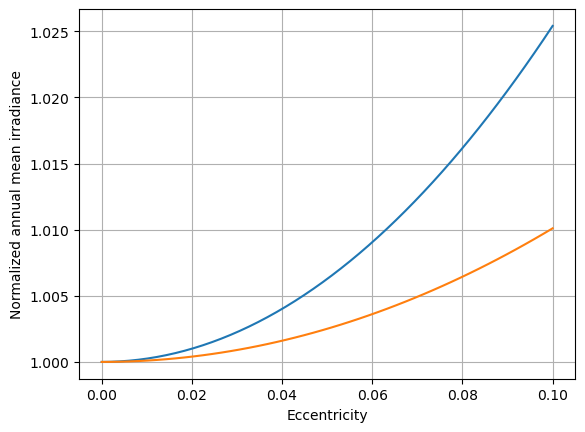

In [21]:
fig, ax = plt.subplots()
ecc = np.linspace(0, 0.1)
ax.plot(ecc, (1+ecc**2/2)/(1-ecc**2)**2)
ax.plot(ecc, 1/(1-ecc**2))
ax.grid()
ax.set_xlabel('Eccentricity')
ax.set_ylabel('Normalized annual mean irradiance')

Our naive estimate gives about a 0.5% increase in irradiance for $e$ between 0.01 and 0.05. This is very clearly an overestimate relative to the 0.1% increase over this range that we calculated numerically.